In [ ]:
# Install Java
!apt-get install openjdk-11-jdk-headless -qq > /dev/null

In [ ]:
# Download Spark (v3.5.0 is stable)
!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz

In [ ]:
# Extract Spark
!tar xf spark-3.5.0-bin-hadoop3.tgz

In [ ]:
# Install findspark (helps Python find Spark)
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("IPL Data Analysis") \
    .getOrCreate()

spark

In [ ]:
match_df = spark.read.csv("/content/Match.csv", header=True, inferSchema=True) #inferschema = true, understands actual datatype
ball_by_ball_df = spark.read.csv("/content/Ball_By_Ball.csv", header=True, inferSchema=True)
team_df = spark.read.csv("/content/Team.csv", header=True, inferSchema=True)
player_df = spark.read.csv("/content/Player.csv", header=True, inferSchema=True)
player_match_df = spark.read.csv("/content/Player_match.csv", header=True, inferSchema=True)


In [ ]:
spark

In [ ]:
match_df.printSchema()

root
 |-- Match_SK: integer (nullable = true)
 |-- match_id: integer (nullable = true)
 |-- Team1: string (nullable = true)
 |-- Team2: string (nullable = true)
 |-- match_date: string (nullable = true)
 |-- Season_Year: integer (nullable = true)
 |-- Venue_Name: string (nullable = true)
 |-- City_Name: string (nullable = true)
 |-- Country_Name: string (nullable = true)
 |-- Toss_Winner: string (nullable = true)
 |-- match_winner: string (nullable = true)
 |-- Toss_Name: string (nullable = true)
 |-- Win_Type: string (nullable = true)
 |-- Outcome_Type: string (nullable = true)
 |-- ManOfMach: string (nullable = true)
 |-- Win_Margin: integer (nullable = true)
 |-- Country_id: integer (nullable = true)



In [ ]:
from pyspark.sql.types import StructField, StringType, IntegerType, StructType, BooleanType, DataType, DecimalType, LongType

Generating a schema for a DataFrame in Spark is beneficial for several reasons:

Performance: When you explicitly define a schema, Spark doesn't have to infer the data types by reading through the entire file. This can significantly speed up the data loading process, especially for large datasets.

Data Integrity: Defining a schema ensures that the data loaded into the DataFrame conforms to the expected structure and data types. If the data doesn't match the schema, Spark can either throw an error or handle the discrepancies based on your configuration, which helps maintain data quality.

Readability and Maintainability: An explicit schema makes your code more readable and understandable. It clearly defines the structure of your data, making it easier for others (or yourself in the future) to understand how the data is organized.

Avoiding Data Type Issues: Schema inference can sometimes lead to incorrect data type assignments, especially for columns with mixed data types or special characters. Defining the schema manually gives you precise control over the data types, preventing potential issues down the line.

In summary, generating a schema is a good practice for better performance, data integrity, code clarity, and control over data types when working with Spark DataFrames.

In [ ]:
ball_by_ball_schema = StructType([
    StructField("MatcH_id", IntegerType(), True),
    StructField("Over_id", IntegerType(), True),
    StructField("Ball_id", IntegerType(), True),
    StructField("Innings_No", IntegerType(), True),
    StructField("Team_Batting", IntegerType(), True),
    StructField("Team_Bowling", IntegerType(), True),
    StructField("Striker_Batting_Position", IntegerType(), True),
    StructField("Extra_Type", StringType(), True),
    StructField("Runs_Scored", IntegerType(), True),
    StructField("Extra_runs", IntegerType(), True),
    StructField("Wides", IntegerType(), True),
    StructField("Legbyes", IntegerType(), True),
    StructField("Byes", IntegerType(), True),
    StructField("Noballs", IntegerType(), True),
    StructField("Penalty", IntegerType(), True),
    StructField("Bowler_Extras", IntegerType(), True),
    StructField("Out_type", StringType(), True),
    StructField("Caught", BooleanType(), True),
    StructField("Bowled", BooleanType(), True),
    StructField("Run_out", BooleanType(), True),
    StructField("LBW", BooleanType(), True),
    StructField("Retired_hurt", BooleanType(), True),
    StructField("Stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("ObstructingFeild", BooleanType(), True),
    StructField("Bowler_Wicket", BooleanType(), True),
    StructField("Match_Date", StringType(), True),
    StructField("Season", IntegerType(), True),
    StructField("Striker", IntegerType(), True),
    StructField("Non_Striker", IntegerType(), True),
    StructField("Bowler", IntegerType(), True),
    StructField("Player_Out", IntegerType(), True),
    StructField("Fielders", IntegerType(), True),
    StructField("Striker_match_SK", IntegerType(), True),
    StructField("StrikerSK", IntegerType(), True),
    StructField("NonStriker_match_SK", IntegerType(), True),
    StructField("NONStriker_SK", IntegerType(), True),
    StructField("Fielder_match_SK", IntegerType(), True),
    StructField("Fielder_SK", IntegerType(), True),
    StructField("Bowler_match_SK", IntegerType(), True),
    StructField("BOWLER_SK", IntegerType(), True),
    StructField("PlayerOut_match_SK", IntegerType(), True),
    StructField("BattingTeam_SK", IntegerType(), True),
    StructField("BowlingTeam_SK", IntegerType(), True),
    StructField("Keeper_Catch", BooleanType(), True),
    StructField("Player_out_sk", IntegerType(), True),
    StructField("MatchDateSK", IntegerType(), True)
])

In [ ]:
match_schema = StructType([
    StructField("Match_SK", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("Team1", StringType(), True),
    StructField("Team2", StringType(), True),
    StructField("match_date", StringType(), True),
    StructField("Season_Year", IntegerType(), True),
    StructField("Venue_Name", StringType(), True),
    StructField("City_Name", StringType(), True),
    StructField("Country_Name", StringType(), True),
    StructField("Toss_Winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("Toss_Name", StringType(), True),
    StructField("Win_Type", StringType(), True),
    StructField("Outcome_Type", StringType(), True),
    StructField("ManOfMach", StringType(), True),
    StructField("Win_Margin", IntegerType(), True),
    StructField("Country_id", IntegerType(), True)
])

In [ ]:
team_schema = StructType([
    StructField("Team_SK", IntegerType(), True),
    StructField("Team_Id", IntegerType(), True),
    StructField("Team_Name", StringType(), True)
])

In [ ]:
player_schema = StructType([
    StructField("PLAYER_SK", IntegerType(), True),
    StructField("Player_Id", IntegerType(), True),
    StructField("Player_Name", StringType(), True),
    StructField("DOB", StringType(), True),
    StructField("Batting_hand", StringType(), True),
    StructField("Bowling_skill", StringType(), True),
    StructField("Country_Name", StringType(), True)
])

In [ ]:
player_match_schema = StructType([
    StructField("Player_match_SK", IntegerType(), True),
    StructField("PlayerMatch_key", LongType(), True),
    StructField("Match_Id", IntegerType(), True),
    StructField("Player_Id", IntegerType(), True),
    StructField("Player_Name", StringType(), True),
    StructField("DOB", StringType(), True),
    StructField("Batting_hand", StringType(), True),
    StructField("Bowling_skill", StringType(), True),
    StructField("Country_Name", StringType(), True),
    StructField("Role_Desc", StringType(), True),
    StructField("Player_team", StringType(), True),
    StructField("Opposit_Team", StringType(), True),
    StructField("Season_year", IntegerType(), True),
    StructField("is_manofThematch", BooleanType(), True),
    StructField("Age_As_on_match", IntegerType(), True),
    StructField("IsPlayers_Team_won", BooleanType(), True),
    StructField("Batting_Status", StringType(), True),
    StructField("Bowling_Status", StringType(), True),
    StructField("Player_Captain", StringType(), True),
    StructField("Opposit_captain", StringType(), True),
    StructField("Player_keeper", StringType(), True),
    StructField("Opposit_keeper", StringType(), True)
])

In [ ]:
from pyspark.sql.functions import col, when, sum, avg, row_number

In [ ]:
# filter to only include fair and valid deliveries i.e., excluding wides and no balls
ball_by_ball_df = ball_by_ball_df.filter((col("wides") == 0) & (col("Noballs") == 0))

In [ ]:
# calculate the total and average runs scored in each match and inning
total_and_avg_runs = ball_by_ball_df.groupBy("MatcH_id", "Innings_No").agg(
    sum("Runs_Scored").alias("Total_Runs"),
    avg("Runs_Scored").alias("Average_Runs")
)

A window function in Spark performs a calculation across a set of table rows that are somehow related to the current row. Unlike aggregate functions (like `SUM`, `AVG`, `COUNT`) which group rows into a single output row, a window function returns a value for each input row.

Window functions are useful for tasks such as:

*   Calculating a running total or moving average.
*   Ranking rows within a partition.
*   Accessing values from a preceding or following row (e.g., calculating the difference between the current row and the previous row).

They operate on a "window" of rows defined by an `OVER` clause, which typically includes partitioning (dividing data into groups) and ordering (sorting rows within each partition).

In [ ]:
#window function : calculate running total of runs in each match for each over
from pyspark.sql.window import Window
WindowSpec = Window.partitionBy("MatcH_id", "Innings_No").orderBy("Over_id")
ball_by_ball_df = ball_by_ball_df.withColumn("Running_Total", sum("Runs_Scored").over(WindowSpec))

In [ ]:
ball_by_ball_df.show()

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+-----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+-------------+
|MatcH_id|Over_id|Ball_id|Innings_No|Team_Batting|Team_Bowling|Striker_Batting_Position|Extra_Type|Runs_Scored|Extra_runs|Wides|Legbyes|Byes|Noballs|Penalty|Bowler_Extras|      Out_type|Caught|Bowled|Run_out|  LBW|Retired_hurt|Stumped|caught_and_bowled|hit_wicket|ObstructingFeild|Bowler_Wicket|Match_Date|Season|Striker|Non_Striker|Bowler|Player_Out|Fielders|Striker_match_SK|StrikerSK|NonStriker_match_SK|NONStriker_SK|F

In [ ]:
#conditional column : flag for high impact balls (either a wicket or more than 6 runs including extras)
ball_by_ball_df = ball_by_ball_df.withColumn(
    "High_Impact_Ball",
    when((col("Bowler_Wicket") == True) | (col("Runs_Scored") + (col("Extra_runs")) > 6), True).otherwise(False))

In [ ]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+-----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+-------------+----------------+
|MatcH_id|Over_id|Ball_id|Innings_No|Team_Batting|Team_Bowling|Striker_Batting_Position|Extra_Type|Runs_Scored|Extra_runs|Wides|Legbyes|Byes|Noballs|Penalty|Bowler_Extras|      Out_type|Caught|Bowled|Run_out|  LBW|Retired_hurt|Stumped|caught_and_bowled|hit_wicket|ObstructingFeild|Bowler_Wicket|Match_Date|Season|Striker|Non_Striker|Bowler|Player_Out|Fielders|Striker_match_SK|StrikerSK|NonStriker_match_S

In [ ]:
from pyspark.sql.functions import year, month, dayofmonth, when

# Extracting year, month, and day from the match date for more detailed time-based analysis
match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))

# High margin win: categorizing win margins into 'high', 'medium', and 'low'
match_df = match_df.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100, "High")
    .when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
    .otherwise("Low")
)

# Analyze the impact of the toss: who wins the toss and the match
match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
)

# Show the enhanced match DataFrame
match_df.show()

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+-------------------+-----------------+
|Match_SK|match_id|               Team1|               Team2|match_date|Season_Year|          Venue_Name| City_Name|Country_Name|         Toss_Winner|        match_winner|Toss_Name|Win_Type|Outcome_Type|    ManOfMach|Win_Margin|Country_id|year|month| day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...| 4/18/2008|       2008|M Chinnaswamy Sta...| Bangalore|  

In [ ]:
from pyspark.sql.functions import lower, regexp_replace
# Normalize and clean player names
player_df = player_df.withColumn("player_name", lower(regexp_replace("player_name", "[^a-zA-Z0-9 ]", "")))

# Handle missing values in 'batting_hand' and 'bowling_skill' with a default 'unknown'
player_df = player_df.na.fill({"batting_hand": "unknown", "bowling_skill": "unknown"})

# Categorizing players based on batting hand
player_df = player_df.withColumn(
    "batting_style",
    when(col("batting_hand").contains("left"), "Left-Handed").otherwise("Right-Handed")
)

# Show the modified player DataFrame
player_df.show()

+---------+---------+---------------+----------+--------------+--------------------+------------+-------------+
|PLAYER_SK|Player_Id|    player_name|       DOB|  Batting_hand|       Bowling_skill|Country_Name|batting_style|
+---------+---------+---------------+----------+--------------+--------------------+------------+-------------+
|        0|        1|     sc ganguly|  7/8/1972| Left-hand bat|    Right-arm medium|       India| Right-Handed|
|        1|        2|    bb mccullum| 9/27/1981|Right-hand bat|    Right-arm medium| New Zealand| Right-Handed|
|        2|        3|     rt ponting|12/19/1974|Right-hand bat|    Right-arm medium|   Australia| Right-Handed|
|        3|        4|      dj hussey| 7/15/1977|Right-hand bat|  Right-arm offbreak|   Australia| Right-Handed|
|        4|        5|mohammad hafeez|10/17/1980|Right-hand bat|  Right-arm offbreak|    Pakistan| Right-Handed|
|        5|        6|       r dravid| 1/11/1973|Right-hand bat|  Right-arm offbreak|       India| Right-

In [ ]:
from pyspark.sql.functions import col, when, current_date, expr

# Add 'veteran_status' column based on Age_As_on_match
player_match_df = player_match_df.withColumn(
    "veteran_status",
    when(col("Age_As_on_match") >= 35, "Veteran").otherwise("Non-Veteran")
)

# Add 'years_since_debut' column based on Season_year
player_match_df = player_match_df.withColumn(
    "years_since_debut",
    (year(current_date()) - col("Season_year"))
)

# Display results
player_match_df.show()


+---------------+---------------+--------+---------+---------------+----------+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|Player_match_SK|PlayerMatch_key|Match_Id|Player_Id|    Player_Name|       DOB|  Batting_hand|       Bowling_skill|Country_Name|Role_Desc|         Player_team|        Opposit_Team|Season_year|is_manofThematch|Age_As_on_match|IsPlayers_Team_won|Batting_Status|Bowling_Status|Player_Captain|Opposit_captain|Player_keeper|Opposit_keeper|veteran_status|years_since_debut|
+---------------+---------------+--------+---------+---------------+----------+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+-----

In [ ]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
team_df.createOrReplaceTempView("team")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
# we coverted dataframe into sql table so we can run queries

GROUP BY is used to combine (group) multiple rows that have the same value in one or more columns.

It’s always used with aggregate functions like SUM(), COUNT(), etc.

In [ ]:
top_scoring_batsmen_per_season = spark.sql("""
SELECT
    p.player_name,
    m.season_year,
    SUM(b.runs_scored) AS total_runs
FROM ball_by_ball b
JOIN match m ON b.match_id = m.match_id
JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON p.player_id = pm.player_id
GROUP BY p.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC
""")

In [ ]:
top_scoring_batsmen_per_season.show()

+-------------+-----------+----------+
|  player_name|season_year|total_runs|
+-------------+-----------+----------+
|     se marsh|       2008|       614|
|    g gambhir|       2008|       532|
|st jayasuriya|       2008|       508|
|    sr watson|       2008|       463|
|     gc smith|       2008|       437|
| ac gilchrist|       2008|       431|
|    yk pathan|       2008|       430|
|     sk raina|       2008|       420|
|     ms dhoni|       2008|       414|
|    rg sharma|       2008|       399|
|     v sehwag|       2008|       399|
|     r dravid|       2008|       370|
|   sc ganguly|       2008|       349|
|     s dhawan|       2008|       340|
|kc sangakkara|       2008|       319|
|    dj hussey|       2008|       318|
|   rv uthappa|       2008|       316|
|  sa asnodkar|       2008|       311|
| yuvraj singh|       2008|       299|
|     pa patel|       2008|       297|
+-------------+-----------+----------+
only showing top 20 rows



In [ ]:
economical_bowlers_powerplay = spark.sql("""
SELECT
    p.player_name,
    AVG(b.runs_scored) AS avg_runs_per_ball,
    COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
HAVING COUNT(*) > 120
ORDER BY avg_runs_per_ball, total_wickets DESC
""")

economical_bowlers_powerplay.show()

+---------------+------------------+-------------+
|    player_name| avg_runs_per_ball|total_wickets|
+---------------+------------------+-------------+
|smsm senanayake|0.8492063492063492|          126|
|      sp narine| 0.929718875502008|          498|
|     gd mcgrath|0.9324324324324325|          222|
|     sl malinga|0.9407630522088354|          996|
|  sohail tanvir| 0.946969696969697|          132|
|     a chandila|0.9513888888888888|          144|
|      dp nannes|0.9532163742690059|          342|
|        b kumar|0.9561487130600572|         1049|
|  bw hilfenhaus|            0.9625|          240|
|      r rampaul|0.9629629629629629|          162|
|       dw steyn|0.9700374531835206|         1068|
|       r ashwin|0.9729344729344729|          702|
|     sm pollock|1.0049019607843137|          204|
|   ankit sharma|1.0072463768115942|          138|
|      rj harris|1.0093896713615023|          426|
|     wpujc vaas|1.0151515151515151|          198|
|      ac thomas|1.027777777777

In [ ]:
toss_impact_individual_matches = spark.sql("""
SELECT m.match_id, m.toss_winner, m.toss_name, m.match_winner,
    CASE WHEN m.toss_winner = m.match_winner THEN 'Won' ELSE 'Lost' END AS match_outcome
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id
""")

toss_impact_individual_matches.show()

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         Lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         Lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         Lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         Lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         Lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         Lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          Won|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         Lost|

In [ ]:
average_runs_in_wins = spark.sql("""
SELECT
    p.player_name,
    AVG(b.runs_scored) AS avg_runs_in_wins,
    COUNT(*) AS innings_played
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON pm.player_id = p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins DESC
""")

average_runs_in_wins.show()

+--------------+------------------+--------------+
|   player_name|  avg_runs_in_wins|innings_played|
+--------------+------------------+--------------+
|   rashid khan|               6.0|             1|
| shahid afridi|3.3333333333333335|             6|
|      an ahmed|               3.0|             3|
|      ba bhatt|               3.0|             2|
|       sn khan|2.5789473684210527|            19|
|    sp jackson|               2.4|             5|
| harmeet singh|2.3333333333333335|             6|
|      umar gul|2.3076923076923075|            13|
|    sm pollock|               2.2|            15|
|       ms gony|2.1379310344827585|            29|
|mj mcclenaghan|               2.0|            11|
|       pr shah|               2.0|             4|
| shivam sharma|               2.0|             2|
|   ds kulkarni|               2.0|             3|
|      rs sodhi|               2.0|             2|
|     vrv singh|               2.0|             2|
| cr brathwaite|1.9642857142857

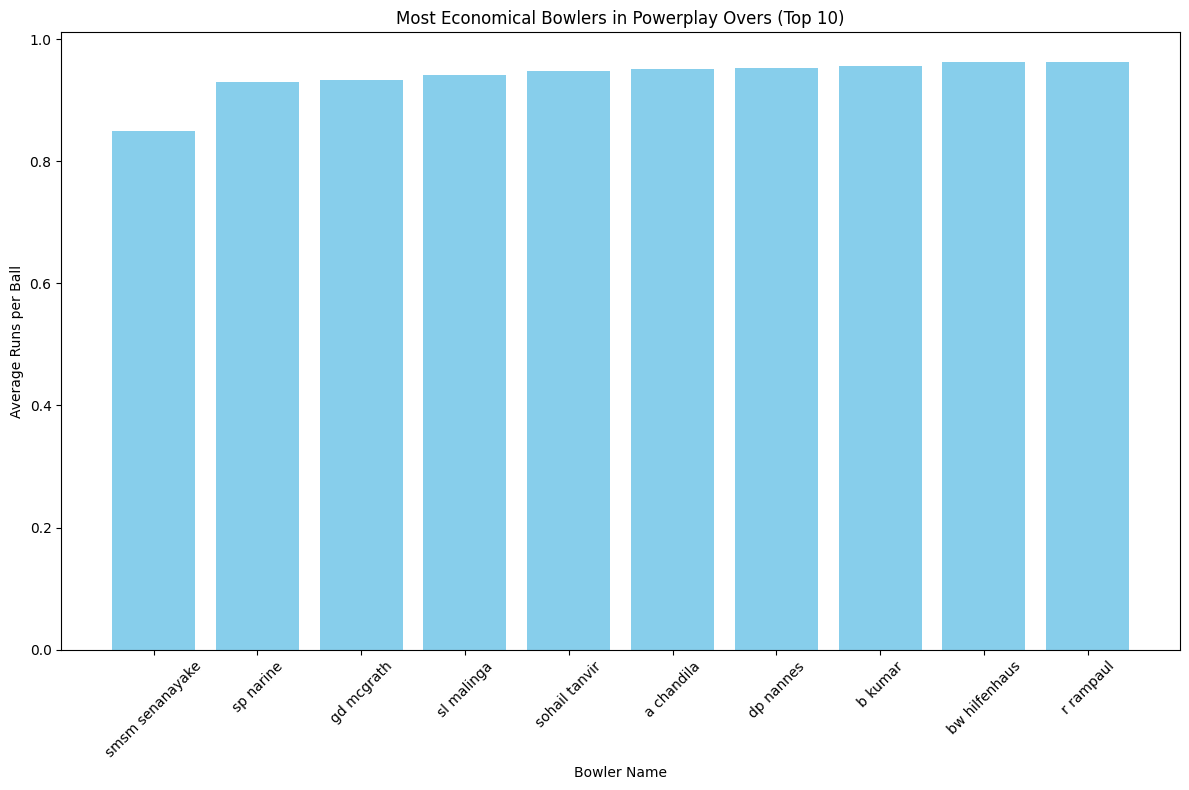

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'economical_bowlers_powerplay' is already executed and available as a Spark DataFrame
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

# Visualizing using Matplotlib
plt.figure(figsize=(12, 8))

# Limiting to top 10 for clarity in the plot
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

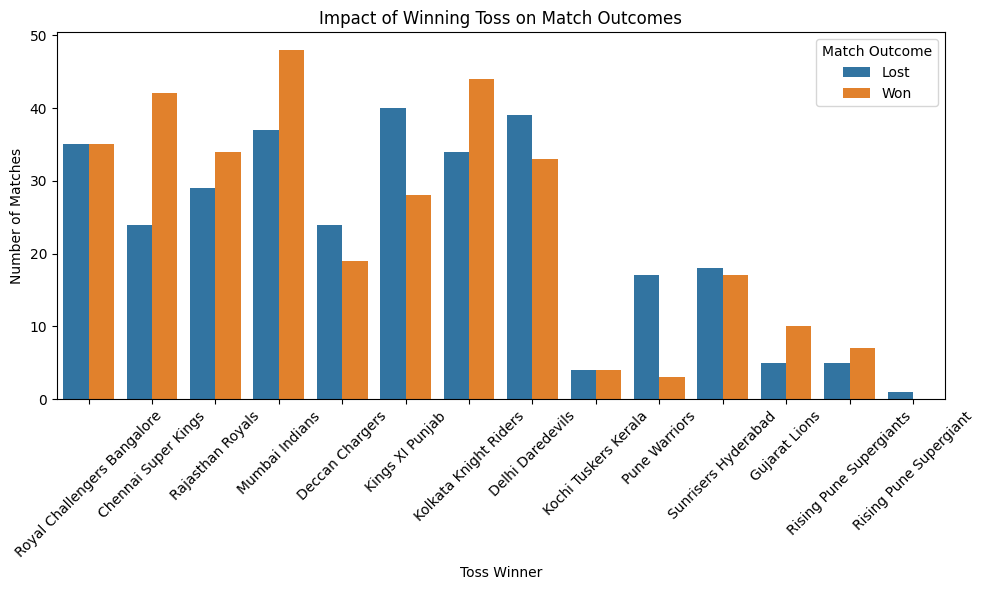

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

toss_impact_pd = toss_impact_individual_matches.toPandas()

# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#inference of the above graph
# RCB jab toss jeet ti hai to jyada harti hai
# CSK jab toss jeet ti hai to chances hai ko wo match bhi jeete

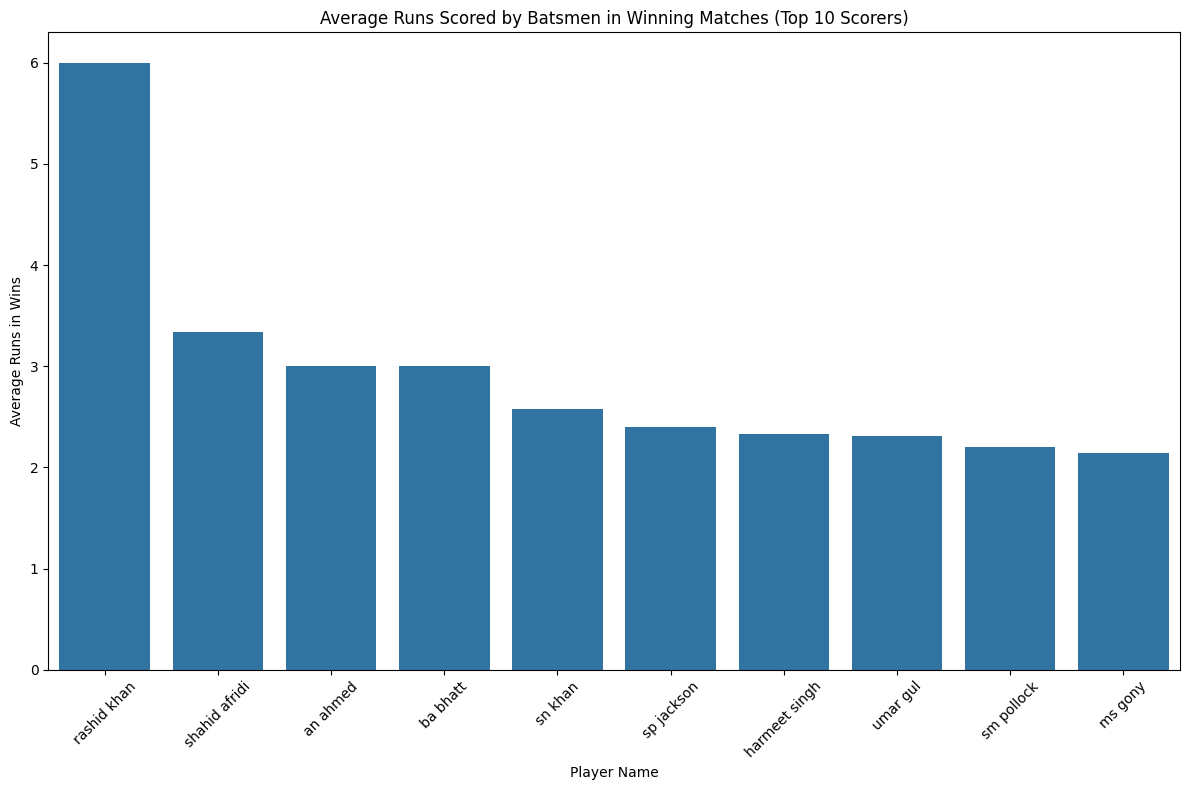

In [ ]:
average_runs_pd = average_runs_in_wins.toPandas()

# Using seaborn to plot average runs in winning matches
plt.figure(figsize=(12, 8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Execute SQL Query
scores_by_venue = spark.sql("""
SELECT venue_name, AVG(total_runs) AS average_score, MAX(total_runs) AS highest_score
FROM (
    SELECT ball_by_ball.match_id, match.venue_name, SUM(runs_scored) AS total_runs
    FROM ball_by_ball
    JOIN match ON ball_by_ball.match_id = match.match_id
    GROUP BY ball_by_ball.match_id, match.venue_name
)
GROUP BY venue_name
ORDER BY average_score DESC
""")
scores_by_venue.show()

+--------------------+------------------+-------------+
|          venue_name|     average_score|highest_score|
+--------------------+------------------+-------------+
|   Brabourne Stadium| 325.8181818181818|          399|
|Saurashtra Cricke...|             319.1|          393|
|Punjab Cricket As...|317.42857142857144|          341|
|    Barabati Stadium|311.57142857142856|          404|
|          Green Park|             308.0|          378|
|Maharashtra Crick...|302.06666666666666|          377|
|Rajiv Gandhi Inte...|             302.0|          365|
|Himachal Pradesh ...| 301.1111111111111|          371|
|MA Chidambaram St...| 299.7291666666667|          447|
|Sardar Patel Stad...|             298.0|          377|
|Punjab Cricket As...|296.77142857142854|          426|
|    Wankhede Stadium| 296.4736842105263|          419|
|Holkar Cricket St...|             296.2|          371|
|Punjab Cricket As...|             296.0|          380|
|M Chinnaswamy Sta...| 292.7878787878788|       

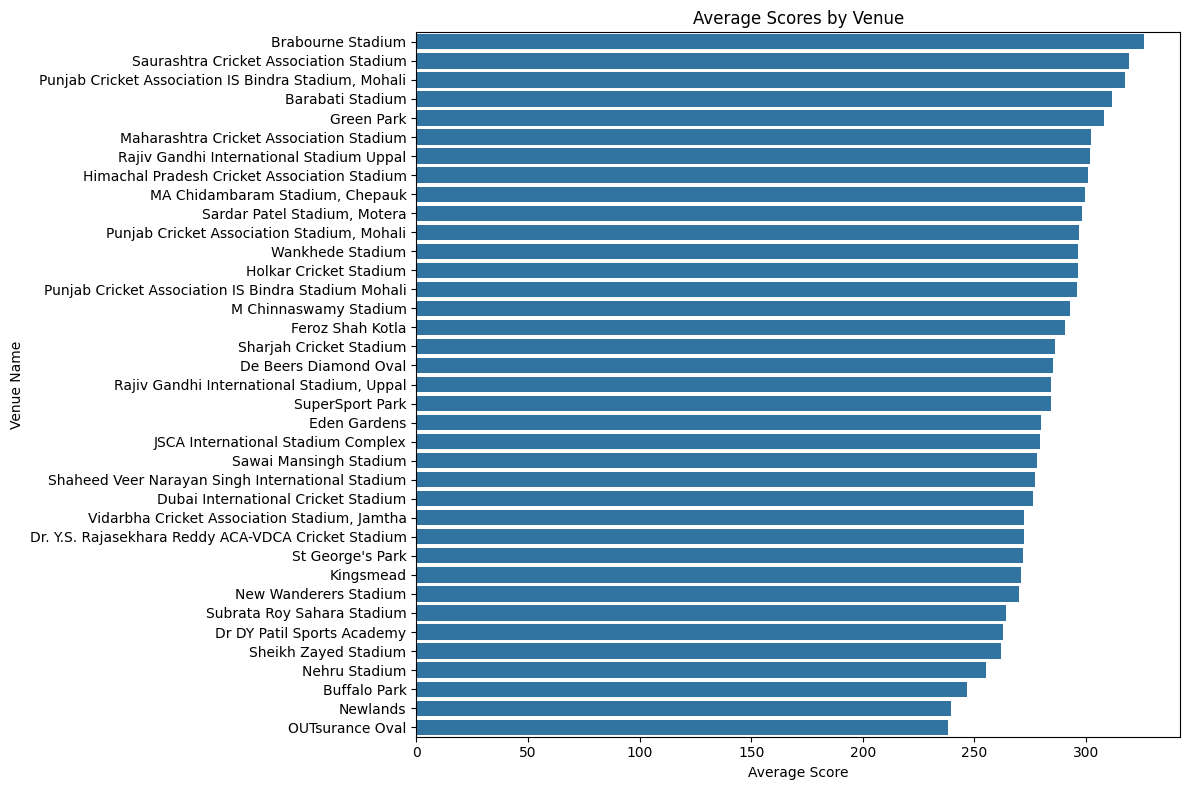

In [ ]:
scores_by_venue_pd = scores_by_venue.toPandas()
plt.figure(figsize=(12, 8))
sns.barplot(x='average_score', y='venue_name', data=scores_by_venue_pd)
plt.title('Average Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue Name')
plt.tight_layout()
plt.show()
